In [260]:
# Required
from math import pi, sin, cos, sqrt, pow, radians, degrees, hypot
import matplotlib.pyplot as plt
import numpy as np

The layout of a shaft carrying two pulleys A and C and supported by two bearings B and D is shown Figure Q4.
The shaft transmits power at 360 rpm from pulley A to pulley C. The diameter of pulley A and C are 200 mm and 300 mm respectively. The belt tensions act horizontally at tpulley C and the ration of belt tension on the tight side to the slack side is 2.5:1. The shafet is made of plain carbon steel with a yield strength of 280MPa and the factor of safety is 2.

![Q4](figs/t5-q4-1.png)

In [261]:
FOS=2
n_rpm=360
rA=0.1
Ta1=2500
Ta2=850
dc=0.3
Sy=280e6

In [262]:
TorqueA = (Ta1 - Ta2)*rA
print(f'Torque at A = {TorqueA} Nm') 

Torque at A = 165.0 Nm


In [263]:
Power = round((2*pi*n_rpm*TorqueA)/60,0)
print(f'Power transmitted = {Power/1000} kW')

Power transmitted = 6.22 kW


In [264]:
velocity = round((pi*dc*(n_rpm/60)),2)
print(f'Velocity = {velocity} m/s')

Velocity = 5.65 m/s


In [265]:
T2=round(Power/(velocity*1.5),1)
print(f'T2 = {T2} N')
T1=round(2.5*T2,1)
print(f'T1 = {T1} N')

T2 = 733.9 N
T1 = 1834.8 N


In [266]:
Fa=2500+850
Fc=T1+T2
print(f'Fa={Fa} N')
print(f'Fc={Fc} N')

Fa=3350 N
Fc=2568.7 N


In [267]:
Ay=Fa

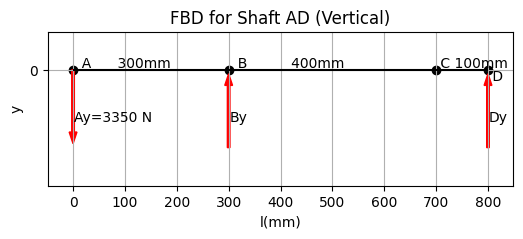

In [268]:
# Vertical Loading

coorA = [0,0]
coorB = [300,0]
coorC = [700,0]
coorD = [800,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T

fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.grid()
ax.set_yticks([0])
ax.scatter(x,y, color='k')

ax.arrow(coorA[0],coorA[1], 0,-120,width=5,color='r')
ax.arrow(coorB[0],coorB[1]-150, 0,120,width=5,color='r')
ax.arrow(coorD[0],coorD[1]-150, 0,120,width=5,color='r')
ax.hlines(0,0,800, colors='k')

ax.set(xlabel='l(mm)', ylabel='y',
       title='FBD for Shaft AD (Vertical)')

ax.text(coorA[0]+2,coorA[1]-100,f'Ay={Ay} N')
ax.text(coorB[0]+2,coorB[1]-100,f'By')
ax.text(coorD[0]+2,coorD[1]-100,f'Dy')
ax.text(coorA[0],coorA[1]+5,f'  A      300mm')
ax.text(coorB[0],coorB[1]+5,f'  B          400mm')
ax.text(coorC[0],coorC[1]+5,f' C 100mm')
ax.text(coorD[0],coorD[1]-20,f' D')

plt.axis('equal')
plt.show()

Calculate reaction force at B and D

$$+\circlearrowleft \sum M_b=0$$
$$3350(300)+D_y(500)=0$$

$$+\uparrow \sum F_y=0$$
$$B_y+D_y-3350=0$$

In [269]:
Dy=-3350*300/500
print(f'Dy={Dy} N')
By=3350-Dy
print(f'By={By} N')

Dy=-2010.0 N
By=5360.0 N


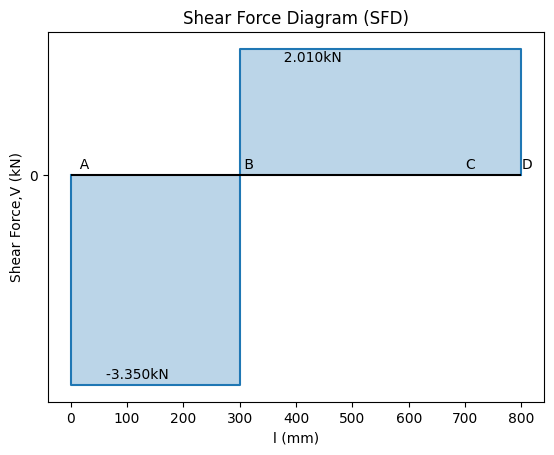

In [270]:
ab=300
ad=800

y=[0,0,ab,ab,ad,ad]
Vy=[0,-Ay,-Ay,-Ay+By,-Ay+By,0]

fig, ax1 = plt.subplots()
ax1.set_yticks([0])
ax1.plot(y,Vy)
ax1.hlines(0,0,ad,colors='black')
ax1.fill_between(y, Vy, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')
ax1.set_xlabel('l (mm)')
ax1.set_ylabel('Shear Force,V (kN)')

ax1.text(coorA[0],coorA[1]+100,f'  A')
ax1.text(coorB[0],coorB[1]+100,f' B')
ax1.text(coorC[0],coorC[1]+100,f'C')
ax1.text(coorD[0],coorD[1]+100,f'D')

ax1.text(coorA[0],Vy[1]+100,f'        {Vy[1]/1000:.3f}kN')
ax1.text(coorB[0],Vy[3]-200,f'          {Vy[3]/1000:.3f}kN')

plt.show()

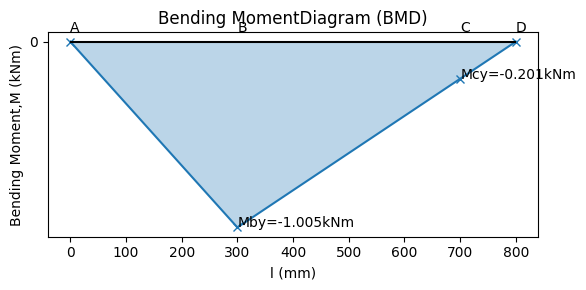

In [271]:
ac=700
bc=400
y=[0,ab,ac,ad]
Mby=-Ay*ab/1000
Mcy=Mby+(-Dy*bc/1000)
My=[0,Mby,Mcy,0]

fig, ax2 = plt.subplots()
ax2.set_yticks([0])
fig.set_size_inches(6,3)
ax2.plot(y, My, marker='x')
ax2.hlines(0,0,ad,colors='black')
ax2.fill_between(y, My, alpha=0.3) # Added fill_between
ax2.set_title('Bending MomentDiagram (BMD)')
ax2.set_xlabel('l (mm)')
ax2.set_ylabel('Bending Moment,M (kNm)')
ax2.text(coorA[0],coorA[1]+50,f'A')
ax2.text(coorB[0],coorB[1]+50,f'B')
ax2.text(coorC[0],coorC[1]+50,f'C')
ax2.text(coorD[0],coorD[1]+50,f'D')
ax2.text(coorB[0],My[1],f'Mby={My[1]/1000}kNm')
ax2.text(coorC[0],My[2],f'Mcy={My[2]/1000}kNm')
plt.tight_layout()
plt.show()

Horizontal component

In [272]:
Cx=Fc

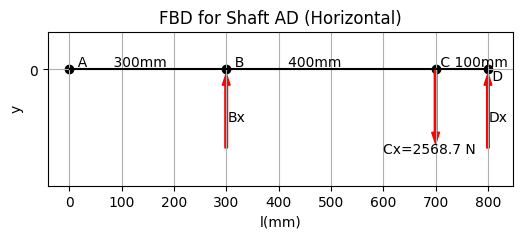

In [273]:
coorA = [0,0]
coorB = [300,0]
coorC = [700,0]
coorD = [800,0]

data = np.array([coorA,coorB,coorC,coorD])
x, y = data.T

fig, ax = plt.subplots()
fig.set_size_inches(6,2)
ax.grid()
ax.set_yticks([0])
ax.scatter(x,y, color='k')

ax.arrow(coorB[0],coorB[1]-150, 0,120,width=5,color='r')
ax.arrow(coorC[0],coorC[1], 0,-120,width=5,color='r')
ax.arrow(coorD[0],coorD[1]-150, 0,120,width=5,color='r')
ax.hlines(0,0,800, colors='k')

ax.set(xlabel='l(mm)', ylabel='y',
       title='FBD for Shaft AD (Horizontal)')

ax.text(coorB[0]+2,coorB[1]-100,f'Bx')
ax.text(coorC[0]-100,coorC[1]-160,f'Cx={Cx} N')
ax.text(coorD[0]+2,coorD[1]-100,f'Dx')
ax.text(coorA[0],coorA[1]+5,f'  A      300mm')
ax.text(coorB[0],coorB[1]+5,f'  B          400mm')
ax.text(coorC[0],coorC[1]+5,f' C 100mm')
ax.text(coorD[0],coorD[1]-20,f' D')

plt.axis('equal')
plt.show()

$$+\circlearrowleft \sum M_b=0$$
$$-2568.7(400)+D_x(500)=0$$

$$+\uparrow \sum F_x=0$$
$$B_x+D_x-2568.7=0$$

In [274]:
Dx=round((Cx*400)/500,0)
print(f'Dx={Dx} N')
Bx=round(Cx-Dx,1)
print(f'Bx={Bx} N')

Dx=2055.0 N
Bx=513.7 N


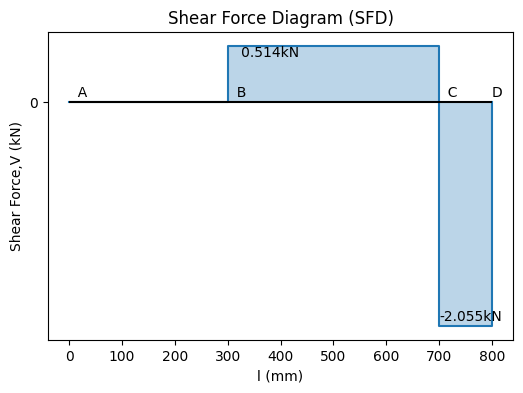

In [275]:
x=[0,0,ab,ab,ac,ac,ad,ad]
Vx=[0,0,0,Bx,Bx,Bx-Cx,Bx-Cx,0]

fig, ax1 = plt.subplots()
fig.set_size_inches(6,4)
ax1.set_yticks([0])
ax1.plot(x,Vx)
ax1.hlines(0,0,ad,colors='black')
ax1.fill_between(x, Vx, alpha=0.3) # Added fill_between
ax1.set_title('Shear Force Diagram (SFD)')
ax1.set_xlabel('l (mm)')
ax1.set_ylabel('Shear Force,V (kN)')

ax1.text(coorA[0],coorA[1]+50,f'  A')
ax1.text(coorB[0],coorB[1]+50,f'  B')
ax1.text(coorC[0],coorC[1]+50,f'  C')
ax1.text(coorD[0],coorD[1]+50,f'D')

ax1.text(coorB[0],Vx[4]-100,f'   {Vx[4]/1000:.3f}kN')
ax1.text(coorC[0],Vx[5]+50,f'{Vx[5]/1000:.3f}kN')

plt.show()

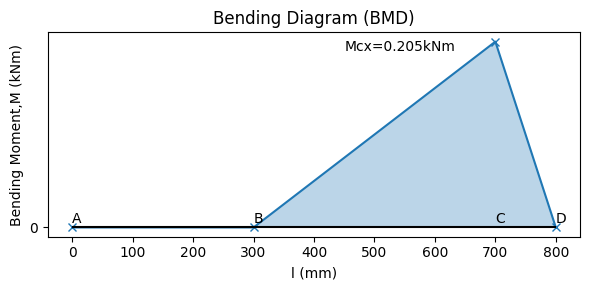

In [ ]:
x=[0,ab,ac,ad]
Mbx=0
Mcx=Bx*bc/1000
Mx=[0,Mbx,Mcx,0]

fig, ax2 = plt.subplots()
fig.set_size_inches(6,3)
ax2.set_yticks([0])
ax2.plot(x, Mx, marker='x')
ax2.hlines(0,0,ad,colors='black')
ax2.fill_between(x, Mx, alpha=0.3) # Added fill_between
ax2.set_title('Bending Moment Diagram (BMD)')
ax2.set_xlabel('l (mm)')
ax2.set_ylabel('Bending Moment,M (kNm)')
ax2.text(coorA[0],coorA[1]+5,f'A')
ax2.text(coorB[0],coorB[1]+5,f'B')
ax2.text(coorC[0],coorC[1]+5,f'C')
ax2.text(coorD[0],coorD[1]+5,f'D')
ax2.text(coorC[0]-250,Mx[2]-10,f'Mcx={Mx[2]/1000:.3f}kNm')
plt.tight_layout()
plt.show()

In [277]:
print(f'{Mbx},{Mby}')
print(f'{Mcx},{Mcy}')
Mb=round(hypot(Mbx,Mby),2)
Mc = round(hypot(Mcx,Mcy),2)
print(f'Mb={Mb/1000:.3f} kNm')
print(f'Mc={Mc/1000:.3f} kNm')
print(f'Mb={Mb:.3e} Nm')
print(f'Mc={Mc:.3e} Nm')

0,-1005.0
205.48000000000002,-201.0
Mb=1.005 kNm
Mc=0.287 kNm
Mb=1.005e+03 Nm
Mc=2.874e+02 Nm


In [278]:
print('Critical point at B')
Mmax = Mb

Critical point at B


In [279]:
print(FOS,TorqueA,Mmax,Sy)
Dmss3 = 32*FOS*hypot(Mmax,TorqueA)/(Sy*pi)
Dmss = round(pow(32*FOS*hypot(Mmax,TorqueA)/(Sy*pi),1/3),5)
print(f'D^3 = {Dmss3:.3e}m^3')
print(f'Diameter = {Dmss}m')
print(f'Diameter = {Dmss*1000}mm')

2 165.0 1005.0 280000000.0
D^3 = 7.410e-05m^3
Diameter = 0.042m
Diameter = 42.0mm


iii

In [280]:
FOS=3
Dmss3 = 32*FOS*hypot(Mmax,TorqueA)/(Sy*pi)
Dmss = round(pow(32*FOS*hypot(Mmax,TorqueA)/(Sy*pi),1/3),5)
print(f'D^3 = {Dmss3:.3e}m^3')
print(f'Diameter = {Dmss}m')
print(f'Diameter = {Dmss*1000}mm')

D^3 = 1.111e-04m^3
Diameter = 0.04808m
Diameter = 48.08mm


iv

In [281]:
new_n_rpm=720
new_torqueA=Power*60/(2*pi*new_n_rpm)
print(f'New torque at A = {new_torqueA} Nm')

New torque at A = 82.49531216929908 Nm
